In [28]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
np.set_printoptions(precision=2)  # reduced display precision on numpy arrays

训练集

In [29]:
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

In [30]:
# data is stored in numpy array/matrix
print(f"X Shape: {X_train.shape}, X Type:{type(X_train)})")
print(X_train)
print(f"y Shape: {y_train.shape}, y Type:{type(y_train)})")
print(y_train)

X Shape: (3, 4), X Type:<class 'numpy.ndarray'>)
[[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]]
y Shape: (3,), y Type:<class 'numpy.ndarray'>)
[460 232 178]


In [31]:
b_init = 0
w_init = np.array([0.0, 0.0, 0.0, 0.0])
print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")

w_init shape: (4,), b_init type: <class 'int'>


# 预测函数
$$ f_{\mathbf{w},b}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b $$

In [32]:
def predict_single_loop(x, w, b):
    return np.dot(x, w) + b

# 代价函数
$$J(\mathbf{w},b)=\frac{1}{2m}\sum_{i=0}^{n-1}(f_{\mathbf{w},b}(\mathbf{x^{(i)}}) - y^{(i)})^2$$

In [33]:
def compute_cost(x: np.ndarray, y: np.ndarray, w: np.ndarray, b):
    m = x.shape[0]
    cost = 0.0
    for i in range(m):
        cost += (predict_single_loop(x[i], w, b) - y[i]) ** 2
    return cost / (2 * m)

In [34]:
print(compute_cost(X_train, y_train, w_init, b_init))

49518.0


# 梯度下降公式
$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{5}  \; & \text{for j = 0..n-1}\\
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \\ \rbrace
\end{align*}$$

这里, n是特征变量个数, 参数为 $w_j$,  $b$, 将会在循环中被同步更新

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{6}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{7}
\end{align}
$$
* m 是训练集数据个数


*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ 是模型预测,此时$y^{(i)}$为目标值

In [35]:
def compute_gradient(x: np.ndarray, y: np.ndarray, w: np.ndarray, b):
    m, n = x.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.
    for i in range(m):
        dj_db = predict_single_loop(x[i], w, b) - y[i]
        for j in range(n):
            dj_dw[j] += dj_db * x[i, j]
    dj_dw /= m
    dj_db /= m
    return dj_db, dj_dw


In [36]:
#Compute and display gradient
tmp_dj_db, tmp_dj_dw = compute_gradient(X_train, y_train, w_init, b_init)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

dj_db at initial w,b: -59.333333333333336
dj_dw at initial w,b: 
 [-4.83e+05 -1.12e+03 -3.67e+02 -1.21e+04]


In [37]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    """
    Performs batch gradient descent to learn theta. Updates theta by taking
    num_iters gradient steps with learning rate alpha

    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters
      b_in (scalar)       : initial model parameter
      cost_function       : function to compute cost
      gradient_function   : function to compute the gradient
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent

    Returns:
      w (ndarray (n,)) : Updated values of parameters
      b (scalar)       : Updated value of parameter
    """
    J_history = []
    w = copy.deepcopy(w_in)
    b = b_in
    for i in range(num_iters):
        dj_db, dj_dw = gradient_function(x, y, w, b)
        b -= alpha * dj_db
        w -= alpha * dj_dw
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            J_history.append( cost_function(x, y, w, b))
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")

    return w, b, J_history

# 接下来测试实现

In [38]:
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.
# some gradient descent settings
iterations = 1000
alpha = 5.0e-7
# run gradient descent
w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b,
                                             alpha, iterations,
                                                    compute_cost, compute_gradient
                                                   )
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_train.shape
for i in range(m):
    print(f"prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

Iteration    0: Cost  2529.46   
Iteration  100: Cost   695.99   
Iteration  200: Cost   694.92   
Iteration  300: Cost   693.86   
Iteration  400: Cost   692.82   
Iteration  500: Cost   691.77   
Iteration  600: Cost   690.74   
Iteration  700: Cost   689.72   
Iteration  800: Cost   688.71   
Iteration  900: Cost   687.70   
b,w found by gradient descent: 0.00,[ 0.2   0.   -0.01 -0.07] 
prediction: 426.18, target value: 460
prediction: 286.17, target value: 232
prediction: 171.47, target value: 178


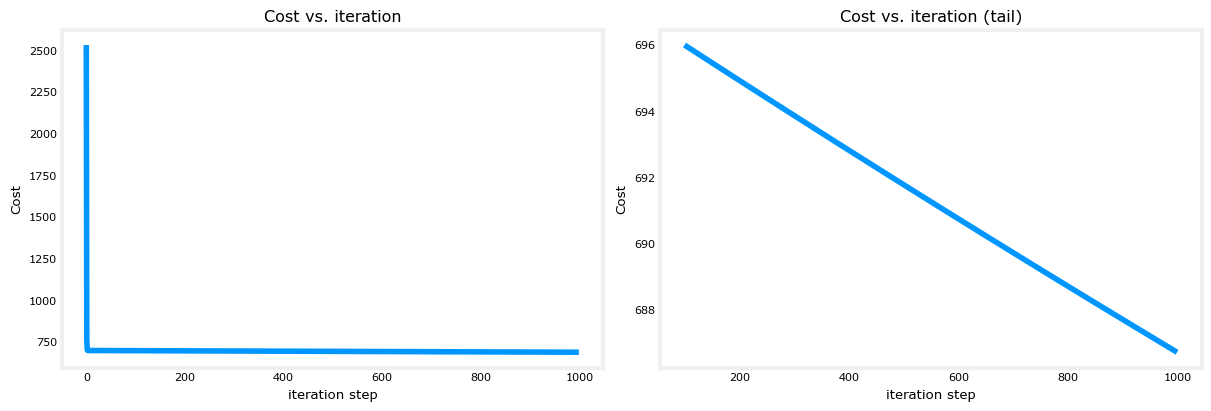

In [39]:
# plot cost versus iteration
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step')
plt.show()